# Group S

## Group Members

## 1. Safial Islam Ayon 
## 2. Md Shohel Mojumder
## 3. Arber Aga
## 4. Imtiaz Ahmed 

# Exercise 1(i).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [24]:
'''Step size'''
d_t = 0.01 

'''Time interval'''
d_t_out = 0.05 

'''Time range [0, 200]'''
N = int(200/d_t) + 1 

'''Cycles'''
cycle = 4001

'''Data are given in Page 3, Example 1.1'''
s = 10
r = 28
b = 8/3
z_0 = np.array([-0.587, -0.563, 16.870])
        
a = 1/np.sqrt(d_t)

'''nonautonomous forcing term (g), which differences between the surrogate physical process 
and the imperfect model. [using equation 1.6 in page 3]'''

g_0 = np.array([a * (1/np.sqrt(2) - 0.5), 
                a * (1/np.sqrt(3) - 0.5), 
                a * (1/np.sqrt(5) - 0.5)])


### Calculating variable z
#### Using equation 1.4 in page 3

In [25]:
def calculate_f(z):
    return np.array([s * (z[1] - z[0]),
                     z[0] * (r - z[2]) - z[1],
                     z[0] * z[1] - b * z[2]])

### Calculating g(n)
#### Using equation 1.27 in page 30

In [26]:
def calculate_g(g_n):
    g_n_plus_1 = []
    for g in g_n:
        if -a/2 <= g < 0:
            val = 1.99999 * g + a/2
        else:
            val = -1.99999 * g + a/2
        g_n_plus_1.append(val)
    
    return np.array(g_n_plus_1)

### Calculating numerical approximation (Forward Euler)
#### Using equation 1.2 in Page 2

In [27]:
def calculate_z():
    data = np.zeros([cycle, 3])
    z = z_0
    g = g_0
    
    index = 0
    step = int(d_t_out/d_t)
    
    '''store only the observed states'''
    for i in range(N):
        if i % step == 0: 
            data[index:] = z
            index += 1
            
        z = z + d_t * (calculate_f(z) + g)
        g = calculate_g(g)
    
    return data.T

# mechanistic model
## Using equation 1.18 in Page 16

In [28]:
def calculate_mechanistic_model_z():
    data = np.zeros([cycle, 3])
    z = z_0
    index = 0
    step = int(d_t_out/d_t)
    
    '''store only the observed states'''
    for i in range(N):
        if i % step == 0:
            data[index:] = z
            index += 1

        z = z + d_t * calculate_f(z)
        
    return data.T

In [41]:
original_trajectory = calculate_z()
print("Original Trajectory:\n", original_trajectory)

new_trajectory = calculate_mechanistic_model_z()
print("New Trajectory:\n", new_trajectory)

Original Trajectory:
 [[-0.587      -0.57066544 -0.70622837 ...  5.46020265  8.18371572
  11.91280974]
 [-0.563      -0.80613794 -1.21147141 ... 10.22138882 14.93307288
  20.16544964]
 [16.87       14.78631654 13.00847125 ... 10.5941114  13.05075191
  19.384856  ]]
New Trajectory:
 [[ -0.587       -0.63317141  -0.80961294 ... -10.13072894 -11.40729254
  -11.85827719]
 [ -0.563       -0.88543575  -1.31974451 ... -13.04629706 -13.16333066
  -11.30451839]
 [ 16.87        14.7569597   12.92644757 ...  25.13841551  28.67541034
   32.00378672]]


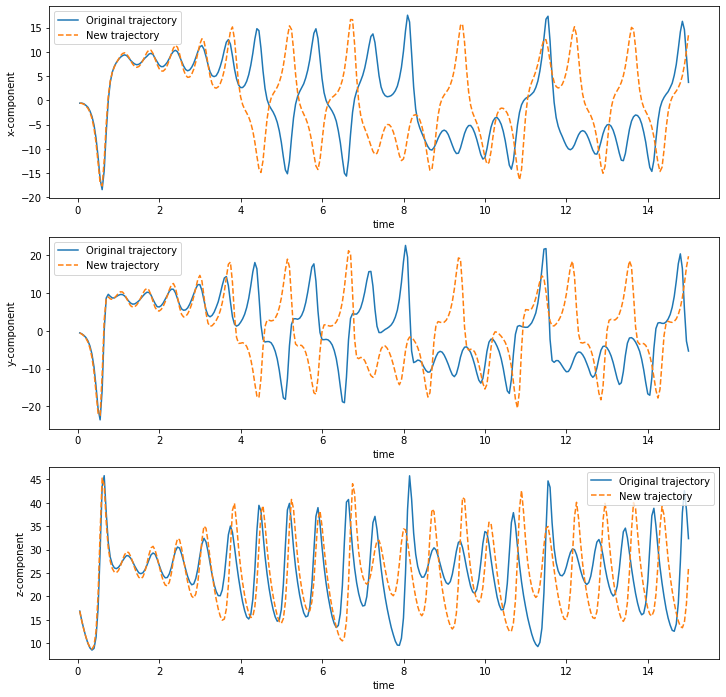

In [42]:
u_range = 300
t = np.linspace(0.05, 200, 4001)
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(12,12))

ax[0].plot(t[:u_range], original_trajectory[0][:u_range], label="Original trajectory")
ax[0].plot(t[:u_range], new_trajectory[0][:u_range], '--', label="New trajectory")
ax[0].set_xlabel("time")
ax[0].set_ylabel("x-component")
ax[0].legend()
           
ax[1].plot(t[:u_range], original_trajectory[1][:u_range], label="Original trajectory")
ax[1].plot(t[:u_range], new_trajectory[1][:u_range], '--', label="New trajectory")
ax[1].set_xlabel("time")
ax[1].set_ylabel("y-component")
ax[1].legend()
           
ax[2].plot(t[:u_range], original_trajectory[2][:u_range], label="Original trajectory")
ax[2].plot(t[:u_range], new_trajectory[2][:u_range], '--', label="New trajectory")
ax[2].set_xlabel("time")
ax[2].set_ylabel("z-component")
ax[2].legend()
           
plt.show()

In [43]:
def rmse(obs, predict):
    error = np.sqrt(1/len(obs) * np.nansum((obs - predict)**2))
    return error

In [44]:
rmse_x = rmse(original_trajectory[0], new_trajectory[0])
rmse_y = rmse(original_trajectory[1], new_trajectory[1])
rmse_z = rmse(original_trajectory[2], new_trajectory[2])

print('RMSE of x-coordinate: ', rmse_x)
print('RMSE of y-coordinate: ', rmse_y)
print('RMSE of z-coordinate: ', rmse_z)

average = (rmse_x + rmse_y + rmse_z) / 3
print("Average RMSE: ", average)

RMSE of x-coordinate:  11.576166834849783
RMSE of y-coordinate:  12.952972074571406
RMSE of z-coordinate:  9.97014437626309
Average RMSE:  11.499761095228093


<b> From Sheet 2: </b>

Time averaged RMSE when Δtout = 0.05 is 1.2145443744861832

Time averaged RMSE when Δtout = 0.15 is 5.982138443725693

<b> Findings: </b>

Comparing Root mean square error (RMSE) in sheet 2 and sheet 3, we can see that, the RMSE is much higher in sheet 3. We can say that when we use noise term the RMSE is much lower compare to when we do not use the noise terms in Lorenz-63 model.

# Exercise 1(ii).

In [11]:
data = original_trajectory

In [12]:
'''Example 1.2 in page 5'''
a = 4 
xi_0 = a * (1/np.sqrt(2) - 0.5)
N = data.shape[1] * 20
N_xi = data.shape[1] * 20

In [13]:
'''linear forward operator [Example 1.2 in page 5]'''

def get_x_ref():
    return data[0][1:]

In [14]:
'''modified tent map to model measurement errors'''

def calculate_xi():
    data_xi = np.zeros(N_xi)
    xi = xi_0
    index = 0
    
    '''store every tenth iterate in the array equation 1.10 in page 5'''
    for i in range(N):
        if i % 10 == 0:
            data_xi[index] = xi
            index = index + 1
            
        '''Using equation 1.28 in page 30'''
        if -a / 2 <= xi < 0:
            xi = 1.99999 * xi + a / 2
        else:
            xi = -1.99999 * xi + a / 2
        
    '''average of first 20 errors [Example 1.2 in page 5]'''
    data_xi = data_xi.reshape(data.shape[1], 20)
    data_xi = np.mean(data_xi, axis=1)
    return data_xi[1:]

In [15]:
'''observation x_obs at time delta_t_out = 0.05 [Example 1.2 in page 5]'''
'''x_obs = x_ref + error'''

def get_x_obs():
    error = calculate_xi()
    return  get_x_ref() + error, error

In [16]:
x_ref = get_x_ref()
x_obs, errors = get_x_obs()

print("The values of x_obs:", x_obs, "\n")
print("Shape of x_obs:", x_obs.shape)

The values of x_obs: [-0.16861821 -0.62966159 -1.17230382 ...  5.46020265  8.18371572
 11.91280974] 

Shape of x_obs: (4000,)


<b> Same as Exercise 1(ii) </b>

In [17]:
'''Step size'''
d_t = 0.01 

'''Time interval'''
d_t_out = 0.05 

'''Time range [0, 200]'''
N = int(200/d_t) + 1 

'''Cycles'''
cycle = 4001

'''Data are given in Page 3, Example 1.1'''
s = 10
r = 28
b = 8/3
z_0 = np.array([-0.587, -0.563, 16.870])
        
a = 1/np.sqrt(d_t)

'''nonautonomous forcing term (g), which differences between the surrogate physical process 
and the imperfect model. [using equation 1.6 in page 3]'''

g_0 = np.array([a * (1/np.sqrt(2) - 0.5), 
                a * (1/np.sqrt(3) - 0.5), 
                a * (1/np.sqrt(5) - 0.5)])


In [18]:
'''Calculating variable z
Using equation 1.4 in page 3'''

def calculate_f(z):
    return np.array([s * (z[1] - z[0]),
                     z[0] * (r - z[2]) - z[1],
                     z[0] * z[1] - b * z[2]])

In [19]:
def calculate_new_z():
    data = np.zeros([cycle, 3])
    z = z_0
    index = 0
    step = int(d_t_out/d_t)
    
    '''store only the observed states'''
    for i in range(N):
        if i % step == 0:
            if i > 0:
                z = np.array([x_obs[index-1], z[1], z[2]]) # Replace current x-coordinate with observed x-coordinate
            data[index:] = z
            index += 1

        z = z + d_t * calculate_f(z)
        
    return data.T

In [20]:
trajectory_new = calculate_new_z()
print("New Trajectory:\n", trajectory_new)

New Trajectory:
 [[-0.587      -0.16861821 -0.62966159 ...  5.46020265  8.18371572
  11.91280974]
 [-0.563      -0.88543575 -1.05263991 ...  9.74918381 14.54124645
  19.92801116]
 [16.87       14.7569597  12.90523969 ... 10.47783264 12.74013849
  18.83792543]]


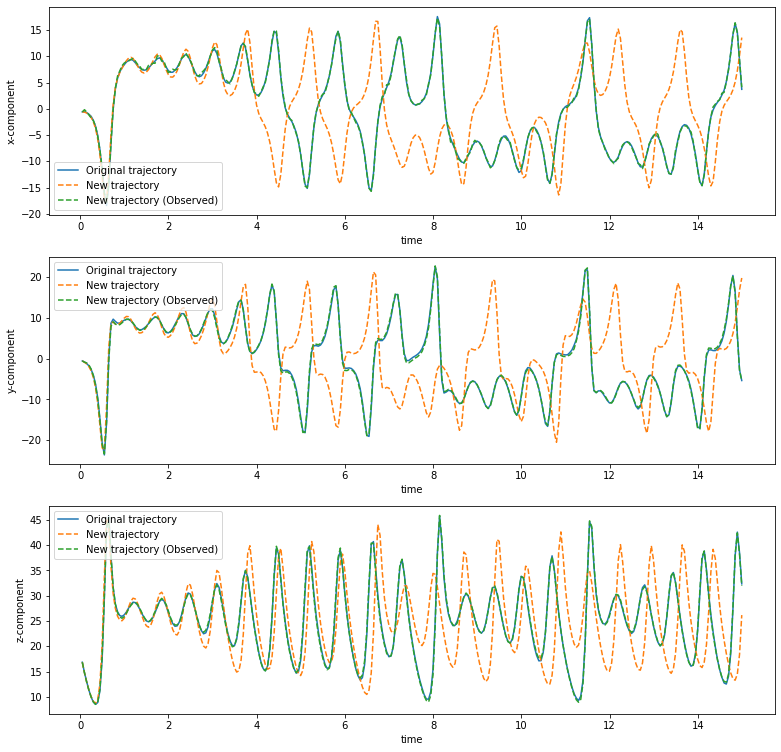

In [21]:
t = np.linspace(0.05, 200, 4001)
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(13,13))
u_range = 300

ax[0].plot(t[:u_range], original_trajectory[0][:u_range], label="Original trajectory")
ax[0].plot(t[:u_range], new_trajectory[0][:u_range], '--', label="New trajectory")
ax[0].plot(t[:u_range], trajectory_new[0][:u_range], '--', label="New trajectory (Observed)")
ax[0].set_xlabel("time")
ax[0].set_ylabel("x-component")
ax[0].legend()
           
ax[1].plot(t[:u_range], original_trajectory[1][:u_range], label="Original trajectory")
ax[1].plot(t[:u_range], new_trajectory[1][:u_range], '--', label="New trajectory")
ax[1].plot(t[:u_range], trajectory_new[1][:u_range], '--', label="New trajectory (Observed)")
ax[1].set_xlabel("time")
ax[1].set_ylabel("y-component")
ax[1].legend()
           
ax[2].plot(t[:u_range], original_trajectory[2][:u_range], label="Original trajectory")
ax[2].plot(t[:u_range], new_trajectory[2][:u_range], '--', label="New trajectory")
ax[2].plot(t[:u_range], trajectory_new[2][:u_range], '--', label="New trajectory (Observed)")
ax[2].set_xlabel("time")
ax[2].set_ylabel("z-component")
ax[2].legend()
           
plt.show()

In [22]:
rmse_x_new = rmse(original_trajectory[0], trajectory_new[0])
rmse_y_new = rmse(original_trajectory[1], trajectory_new[1])
rmse_z_new = rmse(original_trajectory[2], trajectory_new[2])

print('RMSE of x-coordinate: ', rmse_x_new)
print('RMSE of y-coordinate: ', rmse_y_new)
print('RMSE of z-coordinate: ', rmse_z_new)

average_new = (rmse_x_new + rmse_y_new + rmse_z_new) / 3
print("Average RMSE: ", average_new)

RMSE of x-coordinate:  0.08623700943801178
RMSE of y-coordinate:  0.2457545170123785
RMSE of z-coordinate:  0.238864052863887
Average RMSE:  0.1902851931047591


<b> Findings: </b>

Comparing the RMSE values of Exercise 1(i) and 1(ii), we easily seen that the RMSE value is much better in the new trajectory. Also, from the graph we see that the original trajetory and new observed trajetory are almost same. So, the later mechanistic Lorenz-63 model will give us much more better forcasting result.